## Hypothesis
To predict the incentive level requested for letting utility companies to lower thermostat setting 
    for 2-3 degrees F when being at home in winter
    
DV: IncAutoS
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ, Latitude, HomeS, EnergyC, 
    MC, ComfNS, HabitC, Trust

### Filter: HomeWYN=1 (i.e., only use people who use heat when being at home in winter)


In [48]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

#table(survey$HomeS)
survey <- survey[survey$HomeS>60,];
survey <- survey[survey$HomeS<80,];
#table(survey$HomeS)

#table(survey$HomeW)
survey <- survey[survey$HomeW>60,];
survey <- survey[survey$HomeW<80,];
#table(survey$HomeW)

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
#table(survey$Job)
#table(survey$Political)
sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "AwayW"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HomeW"       "HouseholdS"  "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [66] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [71] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [76] "MC4"         "MC5"         "OwnRent"     "PBC1"        "PBC2"       
 [81] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [86] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [91] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [96] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[101] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[106] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

In [49]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "X.9to5" "191"   
[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC1" "191"     
[1] "EnergyC2" "191"     
[1] "EnergyC3" "191"     
[1] "EnergyC4" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "MC3" "191"
[1] "MC4" "191"
[1] "MC5" "191"
[1] "Frugal1" "191"    
[1] "Frugal2" "191"    
[1] "Frugal3" "191"    
[1] "Trust1" "191"   
[1] "Trust2" "191"   
[1] "Trust3" "191"   
[1] "Trust4" "191"   
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ComfNW1" "191"    
[1] "ComfNW2" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3"

In [50]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeS","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 732 104
[1] 490 104


In [51]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNW",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeW",
"Trust",
"Winter_avgF")

In [52]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeW"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "OwnRent"     "PBC1"        "PBC2"       
 [76] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [81] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [86] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [91] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
 [96] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[101] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Atti"        "ComfNW"      "Educ"        "EnergyC"    
 [6] "Ethnic"      "Frugal"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeW"       "HouseholdS"  "Income"      "Latitude"    "MC"         
[16] "OwnRent"     "PBC"         "Political"   "SN"          "SqftCate"   
[21] "SubNorm"     "Trust"       "Trust"       "Winter_avgF"

In [53]:
data1 <- data2[, which(names(data2) %in% c("IncAutoW",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "ComfNW"      "Educ"        "EnergyC"    
 [6] "Ethnic"      "Gender"      "HabitC"      "HabitG"      "HomeW"      
[11] "HouseholdS"  "IncAutoW"    "Income"      "Latitude"    "MC"         
[16] "OwnRent"     "Political"   "SN"          "SqftCate"    "SubNorm"    
[21] "Trust"       "Winter_avgF"

In [54]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [55]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [56]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeW"       "IncAutoW"    "Age"         "Gender"      "OwnRent"    
 [6] "SqftCate"    "HouseholdS"  "Political"   "Ethnic"      "Income"     
[11] "Educ"        "Latitude"    "EnergyC"     "Trust"       "MC"         
[16] "ComfNW"      "Atti"        "SubNorm"     "SN"          "HabitG"     
[21] "HabitC"      "Winter_avgF"

In [57]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [58]:
#convert all data to numeric values

sapply(data2,sd)

HomeW    IncAutoW         Age      Gender     OwnRent    SqftCate 
       3.36        1.99       11.23        0.50        0.51        1.13 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       1.21        0.85        0.35        1.98        1.12        5.09 
    EnergyC       Trust          MC      ComfNW        Atti     SubNorm 
       1.39        1.38        1.08        1.71        1.08        1.34 
         SN      HabitG      HabitC Winter_avgF 
       1.40        1.16        1.38       11.43

In [59]:
hiCor(data2,.7)

,Latitude,Winter_avgF
Latitude,1.00,-0.85
Winter_avgF,-0.85,1.00


In [60]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:21];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:21){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    Gender EnergyC    MC  Atti SubNorm    SN HabitG HabitC
PC1   -0.2   -0.41 -0.33 -0.43   -0.38 -0.23   -0.3  -0.28
[1] 0.24
     Age OwnRent SqftCate HouseholdS Income
PC2 0.33    0.48     0.49       0.23   0.42
[1] 0.34
    HomeW HouseholdS Ethnic Latitude ComfNW HabitC Winter_avgF
PC3  0.44        0.2  -0.26    -0.46   0.28  -0.23        0.48
[1] 0.41
    Gender HouseholdS Educ Latitude ComfNW HabitC Winter_avgF
PC4  -0.27      -0.38 0.22    -0.45  -0.42    0.2        0.42
[1] 0.47
    IncAutoW  Age HouseholdS Political Ethnic Income Educ EnergyC Trust
PC5     0.27 0.21      -0.21      0.52  -0.22   0.24 0.35    0.24 -0.33
[1] 0.53
    IncAutoW  Age Political Income Trust   MC    SN HabitG
PC6     0.51 0.35      -0.2  -0.23 -0.25 0.26 -0.26   0.39
[1] 0.57
     Age HouseholdS Ethnic Educ Trust ComfNW HabitC
PC7 0.32      -0.35   0.38  0.3  0.43   0.39  -0.22
[1] 0.62
    HomeW IncAutoW  Age Gender Political Income  Educ ComfNW SubNorm HabitG
PC8 -0.23    -0.26 0.22   0.55

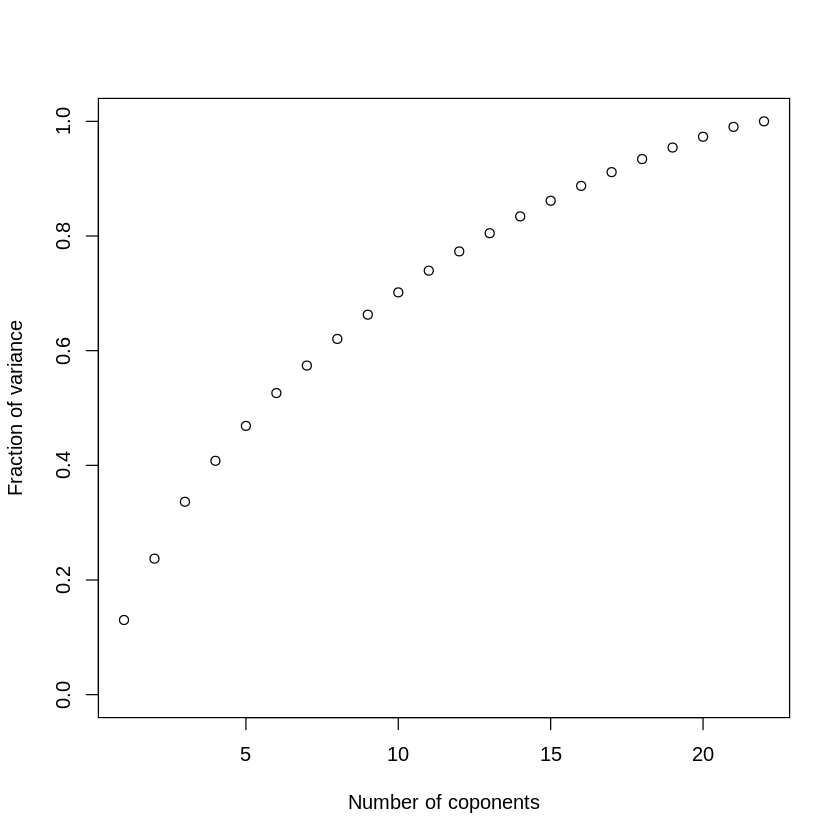

In [61]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [62]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [63]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Winter_avgF,22,0.62
Latitude,12,0.61
SqftCate,6,0.43
Atti,17,0.43
EnergyC,13,0.41
OwnRent,5,0.35
Income,10,0.29
SubNorm,18,0.28
HouseholdS,7,0.26
HabitC,21,0.25
MC,15,0.23


In [64]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeW    IncAutoW         Age      Gender     OwnRent    SqftCate 
       0.91        0.97        1.00        0.92        0.99        0.99 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       1.00        0.94        0.95        0.99        0.97        0.29 
    EnergyC       Trust          MC      ComfNW        Atti     SubNorm 
       0.53        0.97        0.77        0.99        0.45        0.72 
         SN      HabitG      HabitC Winter_avgF 
       0.91        0.84        0.88        0.16 

Loadings:
            Factor1 Factor2
EnergyC      0.69          
Atti         0.74          
SubNorm      0.53          
Latitude            -0.84  
Winter_avgF          0.91  
HomeW                      
IncAutoW                   
Age                        
Gender                     
OwnRent                    
SqftCate                   
HouseholdS                 
Political   

In [65]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])
sort(names(data2))

[1] "Age"         "Atti"        "ComfNW"      "Educ"        "EnergyC"    
 [6] "Ethnic"      "Gender"      "HabitC"      "HabitG"      "HomeW"      
[11] "HouseholdS"  "IncAutoW"    "Income"      "Latitude"    "MC"         
[16] "OwnRent"     "Political"   "SN"          "SqftCate"    "SubNorm"    
[21] "Trust"       "Winter_avgF"

In [66]:
#Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ, Latitude, HomeS, EnergyC, 
#    MC, ComfNS, HabitC, Trust, Winter_avgF

In [67]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'HomeW', 'EnergyC', 'MC', 'ComfNW', 'HabitC', 'Trust', 'Winter_avgF')

In [68]:
fmla <- as.formula(paste("IncAutoW",paste(IndepPred,collapse="+"),sep="~"));

In [69]:
table(data2[,"IncAutoW"])


  1   2   3   4   5   6   7   8 
 35  57  98 128  49  37  35  51 

In [70]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.412 -1.412 -0.258  1.103  4.529 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.51272    2.75110    2.00  0.04566 *  
Age          0.02493    0.00858    2.90  0.00386 ** 
Gender       0.01679    0.18962    0.09  0.92947    
OwnRent     -0.24799    0.20814   -1.19  0.23406    
SqftCate     0.17967    0.10024    1.79  0.07370 .  
HouseholdS  -0.08333    0.08269   -1.01  0.31410    
Political    0.10795    0.11018    0.98  0.32770    
Ethnic      -0.29330    0.25747   -1.14  0.25521    
Income       0.03121    0.05155    0.61  0.54524    
Educ        -0.07610    0.08396   -0.91  0.36521    
Latitude     0.01936    0.02718    0.71  0.47656    
HomeW       -0.00633    0.03088   -0.20  0.83775    
EnergyC     -0.26088    0.06936   -3.76  0.00019 ***
MC           0.10485    0.08504    1.23  0.21822    
ComfNW       0.07426    0.05854    1.27  0.20522    
HabitC      -

In [71]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,3.5e+01,35.211,9.691,2.0e-03
Gender,1,2.4e+00,2.425,0.667,4.1e-01
OwnRent,1,1.5e+00,1.493,0.411,5.2e-01
SqftCate,1,1.7e+01,16.684,4.592,3.3e-02
HouseholdS,1,5.1e-01,0.514,0.141,7.1e-01
Political,1,3.1e-01,0.308,0.085,7.7e-01
Ethnic,1,4.8e+00,4.758,1.310,2.5e-01
Income,1,9.7e-02,0.097,0.027,8.7e-01
Educ,1,1.2e+01,12.118,3.335,6.8e-02
Latitude,1,5.5e+00,5.457,1.502,2.2e-01


In [72]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.427 -1.243 -0.165  1.045  4.541 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.95525    4.05649    1.22   0.2233   
Age          0.02639    0.01334    1.98   0.0493 * 
Gender       0.35206    0.29646    1.19   0.2365   
OwnRent     -0.15966    0.30272   -0.53   0.5985   
SqftCate     0.14269    0.15295    0.93   0.3520   
HouseholdS  -0.07578    0.12150   -0.62   0.5335   
Political    0.20760    0.17901    1.16   0.2476   
Ethnic      -1.04212    0.34055   -3.06   0.0025 **
Income      -0.03500    0.07572   -0.46   0.6444   
Educ        -0.05490    0.13064   -0.42   0.6748   
Latitude     0.06464    0.04521    1.43   0.1544   
HomeW        0.00784    0.04425    0.18   0.8595   
EnergyC     -0.31136    0.11139   -2.80   0.0057 **
MC          -0.03364    0.14057   -0.24   0.8111   
ComfNW      -0.02176    0.08954   -0.24   0.8083   

In [73]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,10.42,10.42,2.8984,0.09025
Gender,1,0.03,0.03,0.0084,0.92718
OwnRent,1,1.83,1.83,0.5090,0.47640
SqftCate,1,3.53,3.53,0.9831,0.32267
HouseholdS,1,0.35,0.35,0.0974,0.75525
Political,1,3.78,3.78,1.0525,0.30619
Ethnic,1,32.63,32.63,9.0754,0.00293
Income,1,2.86,2.86,0.7969,0.37312
Educ,1,4.56,4.56,1.2689,0.26135
Latitude,1,11.22,11.22,3.1212,0.07884


In [74]:
mod = lm(fmla,data=data2,subs=data2$Winter_avgF<30)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avgF < 
    30)

Residuals:
   Min     1Q Median     3Q    Max 
-4.642 -1.323 -0.173  1.399  3.996 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  7.99764    5.06416    1.58   0.1165   
Age          0.01497    0.01458    1.03   0.3061   
Gender       0.00957    0.34336    0.03   0.9778   
OwnRent     -0.39323    0.40372   -0.97   0.3317   
SqftCate     0.28346    0.17920    1.58   0.1159   
HouseholdS  -0.09642    0.15719   -0.61   0.5406   
Political   -0.01280    0.19545   -0.07   0.9479   
Ethnic       0.59582    0.67198    0.89   0.3768   
Income       0.09044    0.10654    0.85   0.3974   
Educ        -0.05381    0.14886   -0.36   0.7183   
Latitude     0.00486    0.04367    0.11   0.9116   
HomeW       -0.04494    0.06101   -0.74   0.4625   
EnergyC     -0.27271    0.12879   -2.12   0.0360 * 
MC           0.24630    0.14169    1.74   0.0843 . 
ComfNW       0.14524    0.10260    1.42   0

In [75]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,6.1e+00,6.1302,1.6649,0.199
Gender,1,1.4e+00,1.4403,0.3912,0.533
OwnRent,1,1.3e-02,0.0132,0.0036,0.952
SqftCate,1,2.3e+01,23.2143,6.3047,0.013
HouseholdS,1,9.5e-03,0.0095,0.0026,0.959
Political,1,7.2e-01,0.7213,0.1959,0.659
Ethnic,1,1.8e+00,1.7598,0.4779,0.490
Income,1,6.7e+00,6.7492,1.8330,0.178
Educ,1,3.2e+00,3.1961,0.8680,0.353
Latitude,1,6.4e-01,0.6397,0.1737,0.677
